<a href="https://colab.research.google.com/github/arpit0498/EIP4/blob/master/work1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# https://keras.io/
!pip install -q keras
import keras

In [91]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers.convolutional import Conv2D
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

from keras.datasets import mnist

In [92]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


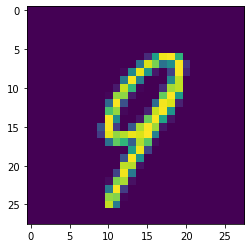

In [93]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[22])

In [94]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [95]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [96]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [97]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [98]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [99]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [100]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [101]:
from keras.layers import Activation
model = Sequential()
model.add(Conv2D(32, 5, 5, activation='relu',  kernel_initializer=keras.initializers.he_uniform(seed=None),input_shape=(28,28,1)))
model.add(Conv2D(32,1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3) , strides=None ))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))


C:\Users\arpit\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), activation="relu", kernel_initializer=<keras.ini..., input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [102]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 24, 24, 32)        1056      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               262272    
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 265,450
Trainable params: 265,450
Non-trainable params: 0
________________________________________________

In [103]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [104]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

C:\Users\arpit\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 23s 390us/step - loss: 0.1254 - accuracy: 0.9622s
Epoch 2/10
60000/60000 [==============================] - 23s 390us/step - loss: 0.0427 - accuracy: 0.9865
Epoch 3/10
60000/60000 [==============================] - 23s 392us/step - loss: 0.0277 - accuracy: 0.9910
Epoch 4/10
60000/60000 [==============================] - 24s 396us/step - loss: 0.0204 - accuracy: 0.9934
Epoch 5/10
60000/60000 [==============================] - 24s 393us/step - loss: 0.0145 - accuracy: 0.9951
Epoch 6/10
60000/60000 [==============================] - 24s 396us/step - loss: 0.0112 - accuracy: 0.9962
Epoch 7/10
60000/60000 [==============================] - 26s 439us/step - loss: 0.0085 - accuracy: 0.9972
Epoch 8/10
60000/60000 [==============================] - 36s 597us/step - loss: 0.0063 - accuracy: 0.9980s - loss: 0.0063 - accuracy: 0.
Epoch 9/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.0072 - accuracy: 0.9976
Epoch

In [105]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [106]:
print(score)

[0.04087778581088215, 0.9914000034332275]


In [107]:
y_pred = model.predict(X_test)

In [108]:
print(y_pred[:9])
print(y_test[:9])

[[3.39977775e-13 5.12757892e-12 1.36977730e-14 8.44033014e-13
  2.58026903e-14 9.81923474e-16 6.90817283e-22 1.00000000e+00
  1.55066059e-18 4.32744535e-11]
 [6.65719404e-16 6.26315135e-13 1.00000000e+00 6.45092957e-21
  7.53594738e-21 1.00205545e-28 4.30478740e-16 3.27582157e-16
  1.10021968e-20 1.47707943e-25]
 [1.38568204e-12 1.00000000e+00 1.98383822e-12 3.92557081e-15
  1.46507673e-09 1.32596993e-12 7.33047477e-12 1.02003950e-09
  9.92184529e-11 1.33270348e-13]
 [1.00000000e+00 2.51808834e-15 4.68214400e-12 1.02152688e-13
  1.06021896e-15 6.08757700e-14 4.25918467e-11 1.30590010e-13
  6.92804971e-13 9.05238801e-17]
 [1.68177174e-15 4.33496258e-15 7.63992286e-20 8.89749200e-20
  1.00000000e+00 6.12888230e-20 1.41107020e-16 5.99175411e-19
  7.36016811e-14 2.70154732e-10]
 [1.83788070e-13 1.00000000e+00 1.08913258e-13 8.45021906e-17
  1.93927846e-10 6.90809197e-15 2.49464620e-14 2.07467843e-09
  5.93544831e-12 1.98045620e-14]
 [3.77595439e-19 6.16990888e-13 3.19645543e-19 2.82578242e

In [109]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [110]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_5'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: 'conv2d_5'